In [6]:
# Create a city list based on random coordinates. Dict or DataFrame? Name, Country, lat, long, Found
# List needs to be very long as we'd expect weather not to find all cities in [OpenWeatherMap API](https://openweathermap.org/api)
# Query open weather map and get Temperature (F), Humidity (%) vs. Latitude, Cloudiness (%), Wind Speed (mph)
# Check coordinates to ensure we got the right city

In [22]:
# Import dependencies
from citipy import citipy
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
from scipy import stats
import datetime
from scipy.stats import linregress

In [23]:
# Create a DataFrame to hold the data
df_weather_data = pd.DataFrame(index=[0])
df_weather_data["City"] = ""
df_weather_data["Country_Code"] = ""
df_weather_data["Input_Lat"] = ""
df_weather_data["Input_Lon"] = ""
df_weather_data["Actual_Lat"] = ""
df_weather_data["Actual_Lon"] = ""
df_weather_data["MaxTemp"] = ""
df_weather_data["Humidity"] = ""
df_weather_data["Cloudiness"] = ""
df_weather_data["Wind_Speed"] = ""
df_weather_data["Date_Time"] = ""

In [25]:
# Create a city list based on random coordinates
# Create random coordinates - more than 500 in case of "failures"
lat = np.random.randint(low=-90, high=90, size=2000)
lon = np.random.randint(low=-180, high=180, size=2000)
# Weather url
url = "http://api.openweathermap.org/data/2.5/weather?"
# Find nearest cities
# for x in range(len(lat)):
x = 0
a = 0
skipped = 0
while a < 500:
    city = citipy.nearest_city(lat[x],lon[x])
    city_name = city.city_name
    city_country = city.country_code
    
    # Build query url
    query_url = url + "appid=" + "35fb1a4a0c59eb148a4297ff5695ccd4" + "&q=" + city_name + "&units=imperial"
    
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    
    print(f"Attempt #{x}: Trying {city_name} in {city_country}  ", end = "")
    
    try:  
    
        df_weather_data.loc[x,"Actual_Lat"] = weather_json["coord"]["lat"]
        df_weather_data.loc[x,"Actual_Lon"] = weather_json["coord"]["lon"]
        df_weather_data.loc[x,"MaxTemp"] = weather_json["main"]["temp_max"]
        df_weather_data.loc[x,"Humidity"] = weather_json["main"]["humidity"]
        df_weather_data.loc[x,"Cloudiness"] = weather_json["clouds"]["all"]
        df_weather_data.loc[x,"Wind_Speed"] = weather_json["wind"]["speed"]
        
        my_timestamp = weather_json["dt"]
        my_dt = datetime.datetime.fromtimestamp(my_timestamp)       
        date_time = f"{my_dt.month}/{my_dt.day}/{my_dt.year} - {my_dt.hour}:{my_dt.minute}:{my_dt.second}"
  
        df_weather_data.loc[x,"Date_Time"] = date_time
        
        df_weather_data.loc[x,"City"] = city_name
        df_weather_data.loc[x,"Country_Code"] = weather_json["sys"]["country"]
        df_weather_data.loc[x,"Input_Lat"] = lat[x]
        df_weather_data.loc[x,"Input_Lon"] = lon[x]
        
        print(f"Success!")
        
       
    
    except (KeyError):
        
        skipped +=1
        print("Ouch! Missing field/result... skipping.")
#         if x == 0:
#             x = -1
#         else:
#             pass
    
    if (x > 10) & (x % 50 == 0):
        df_weather_data.drop_duplicates(subset=["City","Actual_Lat","Actual_Lon"], inplace=True)
        a = df_weather_data["City"].count()
        print("---------------------------------")
        print(f"Checking for duplicates.....resetting counter: {a}")
        print("---------------------------------")
        
        
    
    x +=1
    

    
print("----------------------------------------------")
print("End of run summary statistics")
print(f"Total records: {a}")
print(f"Number of requests returning no results: {skipped}")
print(f"Number of duplicates removed: {((x-skipped))-a}")

Attempt #0: Trying rundu in na  Success!
Attempt #1: Trying ushuaia in ar  Success!
Attempt #2: Trying chuy in uy  Success!
Attempt #3: Trying pevek in ru  Success!
Attempt #4: Trying mogzon in ru  Success!
Attempt #5: Trying cape town in za  Success!
Attempt #6: Trying ushuaia in ar  Success!
Attempt #7: Trying rikitea in pf  Success!
Attempt #8: Trying punta arenas in cl  Success!
Attempt #9: Trying mataura in pf  Success!
Attempt #10: Trying qaanaaq in gl  Success!
Attempt #11: Trying rikitea in pf  Success!
Attempt #12: Trying slantsy in ru  Success!
Attempt #13: Trying sanghar in pk  Success!
Attempt #14: Trying mahajanga in mg  Success!
Attempt #15: Trying butaritari in ki  Success!
Attempt #16: Trying codrington in ag  Success!
Attempt #17: Trying albany in au  Success!
Attempt #18: Trying punta arenas in cl  Success!
Attempt #19: Trying araouane in ml  Success!
Attempt #20: Trying umzimvubu in za  Ouch! Missing field/result... skipping.
Attempt #21: Trying ushuaia in ar  Succes

Attempt #165: Trying atuona in pf  Success!
Attempt #166: Trying guerrero negro in mx  Success!
Attempt #167: Trying albany in au  Success!
Attempt #168: Trying luderitz in na  Success!
Attempt #169: Trying ponta do sol in pt  Success!
Attempt #170: Trying cape town in za  Success!
Attempt #171: Trying camacha in pt  Success!
Attempt #172: Trying cape town in za  Success!
Attempt #173: Trying eureka in us  Success!
Attempt #174: Trying ushuaia in ar  Success!
Attempt #175: Trying lavrentiya in ru  Success!
Attempt #176: Trying hilo in us  Success!
Attempt #177: Trying victoria point in au  Success!
Attempt #178: Trying rikitea in pf  Success!
Attempt #179: Trying mombetsu in jp  Success!
Attempt #180: Trying saint george in bm  Success!
Attempt #181: Trying cherskiy in ru  Success!
Attempt #182: Trying tuatapere in nz  Success!
Attempt #183: Trying severo-kurilsk in ru  Success!
Attempt #184: Trying busselton in au  Success!
Attempt #185: Trying talnakh in ru  Success!
Attempt #186: Tr

Attempt #326: Trying busselton in au  Success!
Attempt #327: Trying illoqqortoormiut in gl  Ouch! Missing field/result... skipping.
Attempt #328: Trying khorion in gr  Ouch! Missing field/result... skipping.
Attempt #329: Trying vila franca do campo in pt  Success!
Attempt #330: Trying ust-barguzin in ru  Success!
Attempt #331: Trying cukai in my  Success!
Attempt #332: Trying vaini in to  Success!
Attempt #333: Trying vaini in to  Success!
Attempt #334: Trying busselton in au  Success!
Attempt #335: Trying praia da vitoria in pt  Success!
Attempt #336: Trying swellendam in za  Success!
Attempt #337: Trying sault sainte marie in ca  Success!
Attempt #338: Trying muroto in jp  Success!
Attempt #339: Trying atuona in pf  Success!
Attempt #340: Trying rocha in uy  Success!
Attempt #341: Trying carnarvon in au  Success!
Attempt #342: Trying mataura in pf  Success!
Attempt #343: Trying namibe in ao  Success!
Attempt #344: Trying bongandanga in cd  Success!
Attempt #345: Trying lompoc in us 

Attempt #649: Trying esperance in au  Success!
Attempt #650: Trying busselton in au  Success!
---------------------------------
Checking for duplicates.....resetting counter: 298
---------------------------------
Attempt #651: Trying novoleushkovskaya in ru  Success!
Attempt #652: Trying arraial do cabo in br  Success!
Attempt #653: Trying riyadh in sa  Success!
Attempt #654: Trying tual in id  Success!
Attempt #655: Trying port blair in in  Success!
Attempt #656: Trying mount isa in au  Success!
Attempt #657: Trying pevek in ru  Success!
Attempt #658: Trying amapa in br  Success!
Attempt #659: Trying saint-ambroise in ca  Success!
Attempt #660: Trying bubaque in gw  Success!
Attempt #661: Trying faya in td  Success!
Attempt #662: Trying hobart in au  Success!
Attempt #663: Trying albany in au  Success!
Attempt #664: Trying hermanus in za  Success!
Attempt #665: Trying punta arenas in cl  Success!
Attempt #666: Trying avarua in ck  Success!
Attempt #667: Trying jamestown in sh  Success

Attempt #809: Trying rikitea in pf  Success!
Attempt #810: Trying saravan in la  Success!
Attempt #811: Trying punta arenas in cl  Success!
Attempt #812: Trying gurskoye in ru  Ouch! Missing field/result... skipping.
Attempt #813: Trying bredasdorp in za  Success!
Attempt #814: Trying rikitea in pf  Success!
Attempt #815: Trying ayutla in mx  Success!
Attempt #816: Trying stornoway in gb  Success!
Attempt #817: Trying port elizabeth in za  Success!
Attempt #818: Trying tuktoyaktuk in ca  Success!
Attempt #819: Trying meyzieu in fr  Success!
Attempt #820: Trying albany in au  Success!
Attempt #821: Trying bethel in us  Success!
Attempt #822: Trying mossendjo in cg  Success!
Attempt #823: Trying palana in ru  Success!
Attempt #824: Trying mataura in pf  Success!
Attempt #825: Trying cherskiy in ru  Success!
Attempt #826: Trying nishiwaki in jp  Success!
Attempt #827: Trying rikitea in pf  Success!
Attempt #828: Trying ancud in cl  Success!
Attempt #829: Trying albany in au  Success!
Atte

Attempt #971: Trying sibolga in id  Success!
Attempt #972: Trying kapaa in us  Success!
Attempt #973: Trying port alfred in za  Success!
Attempt #974: Trying kodiak in us  Success!
Attempt #975: Trying faanui in pf  Success!
Attempt #976: Trying new norfolk in au  Success!
Attempt #977: Trying jamestown in sh  Success!
Attempt #978: Trying mount isa in au  Success!
Attempt #979: Trying punta arenas in cl  Success!
Attempt #980: Trying seoul in kr  Success!
Attempt #981: Trying yima in cn  Success!
Attempt #982: Trying sao joao da barra in br  Success!
Attempt #983: Trying rikitea in pf  Success!
Attempt #984: Trying balakhninskiy in ru  Success!
Attempt #985: Trying lata in sb  Success!
Attempt #986: Trying bambous virieux in mu  Success!
Attempt #987: Trying rikitea in pf  Success!
Attempt #988: Trying mataura in pf  Success!
Attempt #989: Trying taolanaro in mg  Ouch! Missing field/result... skipping.
Attempt #990: Trying ushuaia in ar  Success!
Attempt #991: Trying severo-kurilsk in

Attempt #1131: Trying cape town in za  Success!
Attempt #1132: Trying kodiak in us  Success!
Attempt #1133: Trying twin falls in us  Success!
Attempt #1134: Trying whitehorse in ca  Success!
Attempt #1135: Trying mozarlandia in br  Success!
Attempt #1136: Trying punta arenas in cl  Success!
Attempt #1137: Trying san patricio in mx  Success!
Attempt #1138: Trying naranjal in py  Success!
Attempt #1139: Trying ratnagiri in in  Success!
Attempt #1140: Trying iqaluit in ca  Success!
Attempt #1141: Trying georgetown in sh  Success!
Attempt #1142: Trying mataura in pf  Success!
Attempt #1143: Trying new norfolk in au  Success!
Attempt #1144: Trying tiksi in ru  Success!
Attempt #1145: Trying mokhotlong in ls  Success!
Attempt #1146: Trying kaputa in zm  Success!
Attempt #1147: Trying panvel in in  Success!
Attempt #1148: Trying prince rupert in ca  Success!
Attempt #1149: Trying chuy in uy  Success!
Attempt #1150: Trying saint-philippe in re  Success!
---------------------------------
Checki

Attempt #1292: Trying port alfred in za  Success!
Attempt #1293: Trying bac lieu in vn  Success!
Attempt #1294: Trying rikitea in pf  Success!
Attempt #1295: Trying jamestown in sh  Success!
Attempt #1296: Trying tuktoyaktuk in ca  Success!
Attempt #1297: Trying nabire in id  Success!
Attempt #1298: Trying lososina in ru  Success!
Attempt #1299: Trying punta arenas in cl  Success!
Attempt #1300: Trying jamestown in sh  Success!
---------------------------------
Checking for duplicates.....resetting counter: 504
---------------------------------
----------------------------------------------
End of run summary statistics
Total records: 504
Number of requests returning no results: 89
Number of duplicates removed: 708


In [26]:
# Check results
df_weather_data

,City,Country_Code,Input_Lat,Input_Lon,Actual_Lat,Actual_Lon,MaxTemp,Humidity,Cloudiness,Wind_Speed,Date_Time
0,rundu,NA,-17,20,-17.9333,19.7667,57.94,27,11,4.74,6/16/2021 - 14:31:7
1,ushuaia,AR,-81,-82,-54.8,-68.3,40.62,87,0,3.44,6/16/2021 - 14:31:8
2,chuy,UY,-49,-37,-33.6971,-53.4616,51.49,68,100,10.69,6/16/2021 - 14:31:8
3,pevek,RU,83,172,69.7008,170.313,32.27,95,96,7.11,6/16/2021 - 14:31:8
4,mogzon,RU,52,112,51.7435,111.961,41.86,95,100,7.49,6/16/2021 - 14:31:9
...,...,...,...,...,...,...,...,...,...,...,...
1283,tuban,ID,-7,112,-6.8976,112.065,77.07,85,84,6.2,6/16/2021 - 14:33:13
1287,svobodnyy,RU,52,129,51.4,128.133,63.95,97,100,8.81,6/16/2021 - 14:34:50
1289,sao joao da ponte,BR,-16,-44,-15.9292,-44.0078,81.09,32,50,4.76,6/16/2021 - 14:34:51
1293,bac lieu,VN,7,106,9.285,105.724,80.91,83,99,6.17,6/16/2021 - 14:34:51


In [27]:
# Add "Hemisphere" column
df_weather_data["Hemisphere"] = ""
for index, row in df_weather_data.iterrows():   
    if df_weather_data.loc[index,"Actual_Lat"]>0:
        df_weather_data.loc[index, "Hemisphere"] = "Northern"
    else:
        df_weather_data.loc[index, "Hemisphere"] = "Southern" 
# Save results as csv file

df_weather_data.to_csv("../output_data/cities_2.csv")

In [46]:
City_ID = np.arange(504)
df_weather_data['City_ID'] = City_ID
df_weather_data_2 = df_weather_data[['City','Actual_Lat','Actual_Lon', 'Date_Time', 'MaxTemp',
                                     'Humidity', 'Cloudiness', 'Wind_Speed']]

In [54]:
df_weather_data_3 = df_weather_data_2.reset_index()
# df_weather_data_2.drop(columns=["Index"])
df_weather_data_3.drop(['index'],axis=1, inplace=True)
df_weather_data_3.index.rename ('City_ID', inplace=True)
df_weather_data_3.to_html("../Output_for_Web_Page/data-table.html")

Conclusion:
1. Random lat,long generator produces as a uniform distribution of latitude <Requests>
2. <Returns> can only be generated where cities are. This suggests no cities above 80' N (Artic Circle) and
below -60' S (Antarctica) which seems reasonable.


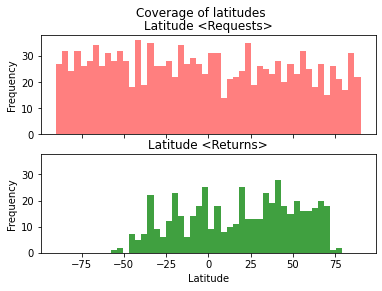

Conclusion:
1. Random lat,long generator produces a uniform distribution of longitude <Requests>
2. <Returns> can only be generated where cities are. This suggests cities are distributed across all longitudes
with concentrations in certain areas (e.g. Europe, North America, SE Asia)


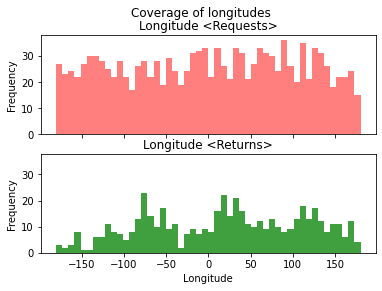

----------------------------------------------------------------------------------------------
Overall conclusion: Random lat,long generator produced random and well distributed data points
----------------------------------------------------------------------------------------------


In [69]:
# Are you getting coverage of the full gamut of latitudes? 
fig1, axes = plt.subplots(2,1,sharex=True, sharey=True)
axes[0].hist(lat[:x].astype(float), bins = 50, range = (-90,90), facecolor='r', alpha=0.5)
axes[1].hist(df_weather_data["Actual_Lat"].astype(float), bins = 50, range = (-90,90),facecolor='g', alpha=0.75)
axes[1].set(xlabel = "Latitude")
axes[0].set(ylabel = "Frequency")
axes[1].set(ylabel = "Frequency")
axes[0].set(title = "Latitude <Requests>")
axes[1].set(title = "Latitude <Returns>")
fig1.suptitle('Coverage of latitudes ', fontsize=12)
print("Conclusion:")
print("1. Random lat,long generator produces as a uniform distribution of latitude <Requests>")
print("2. <Returns> can only be generated where cities are. This suggests no cities above 80' N (Artic Circle) and") 
print("below -60' S (Antarctica) which seems reasonable.")
plt.show()
# Are you getting coverage of the full gamut of longitudes? 
fig2, axes = plt.subplots(2,1,sharex=True, sharey=True)
axes[0].hist(lon[:x].astype(float), bins = 50, range = (-180,180), facecolor='r', alpha=0.5)
axes[1].hist(df_weather_data["Actual_Lon"].astype(float), bins = 50, range = (-180,180),facecolor='g', alpha=0.75)
axes[1].set(xlabel = "Longitude")
axes[0].set(ylabel = "Frequency")
axes[1].set(ylabel = "Frequency")
axes[0].set(title = "Longitude <Requests>")
axes[1].set(title = "Longitude <Returns>")
fig2.suptitle('Coverage of longitudes ', fontsize=12)
print("Conclusion:")
print("1. Random lat,long generator produces a uniform distribution of longitude <Requests>")
print("2. <Returns> can only be generated where cities are. This suggests cities are distributed across all longitudes")
print("with concentrations in certain areas (e.g. Europe, North America, SE Asia)")
plt.show()
print("----------------------------------------------------------------------------------------------")
print("Overall conclusion: Random lat,long generator produced random and well distributed data points")
print("----------------------------------------------------------------------------------------------")
fig1.savefig('../Output_for_Web_Page/LatHist.png')
fig2.savefig('../Output_for_Web_Page/LongHist.png')

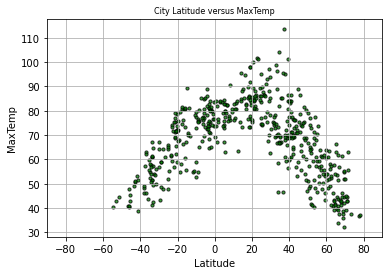

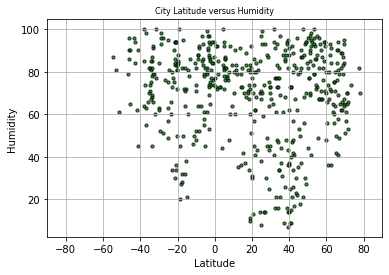

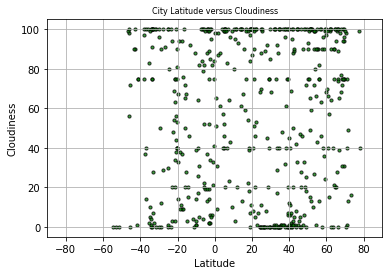

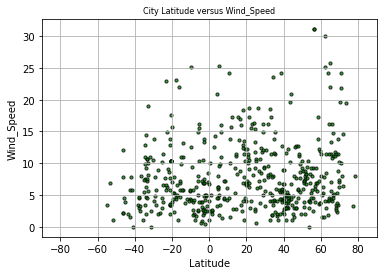

In [68]:
# Your first requirement is to create a series of scatter plots to showcase the following relationships:

# * Temperature (F) vs. Latitude
# * Humidity (%) vs. Latitude
# * Cloudiness (%) vs. Latitude
# * Wind Speed (mph) vs. Latitude
# After each plot add a sentence or too explaining what the code is and analyzing.


scatter_list = ["MaxTemp","Humidity","Cloudiness","Wind_Speed"]
comments = {"MaxTemp":"Looking at relationship/correlation between Temp (F) and Latitude", 
            "Humidity":"Looking at relationship/correlation between Humidity and Latitude",
           "Cloudiness":"Looking at relationship/correlation between Cloudiness(%) and Latitude",
           "Wind_Speed":"Looking at relationship/correlation between Wind Speed (mph) and Latitude"}

for scatter in scatter_list:
    # fig, axes
    y_values = df_weather_data[scatter].astype(float)
    x_values = df_weather_data["Actual_Lat"].astype(float)
    plt.ylabel(scatter)
    plt.title(f'City Latitude versus {scatter}', fontsize=8)
    plt.scatter(x_values,y_values,marker="o", facecolors="green", edgecolors="black", s=10, alpha=0.75)
    plt.xlabel('Latitude')
    plt.xlim(-90,90)
    plt.grid()
#    plt.figure(figsize=(6.4,4.8)) 
#     print(scatter)
#     print(comments[scatter])
    filename = f"Scatter_Plot_{scatter}.png"
    path = f"../Output_for_Web_Page/{filename}"
    plt.savefig(path)
    plt.show()

The r-squared is: 0.763
y = -0.99x + 98.0


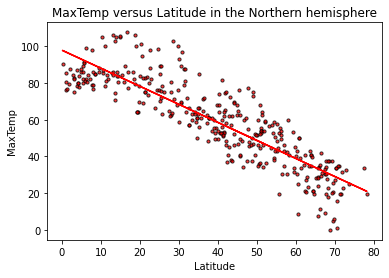

The r-squared is: 0.594
y = 0.65x + 84.48


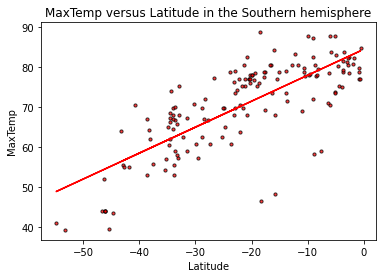

Both  hemispheres show correlations of Temp reducing with distance from equator. Two points of interest: the models predict different temperatures at the equator (y-intercept) and have different slopes
The r-squared is: 0.043
y = 0.25x + 55.21


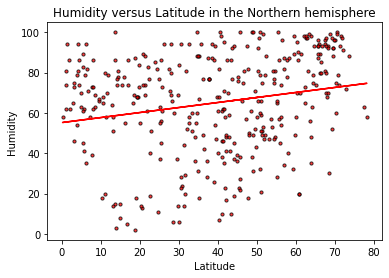

The r-squared is: 0.021
y = 0.19x + 75.36


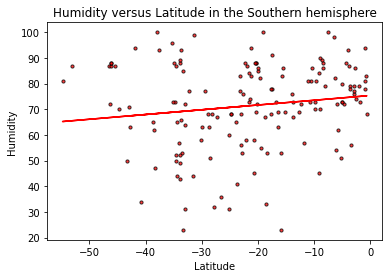

No correlation
The r-squared is: 0.03
y = 0.32x + 45.31


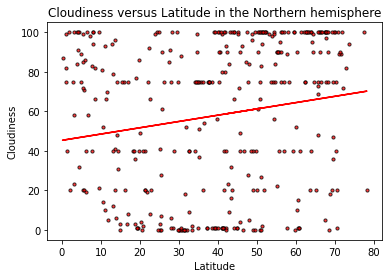

The r-squared is: 0.104
y = 0.95x + 71.3


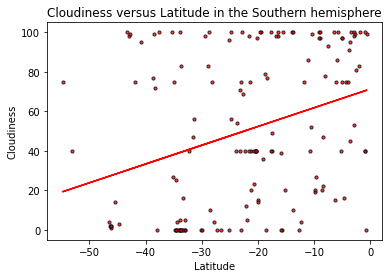

No correlation
The r-squared is: 0.009
y = 0.03x + 7.34


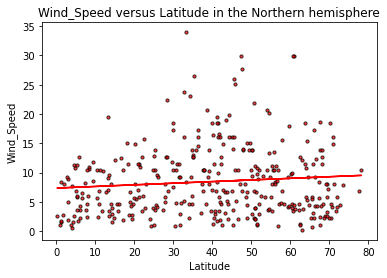

The r-squared is: 0.0
y = -0.01x + 7.1


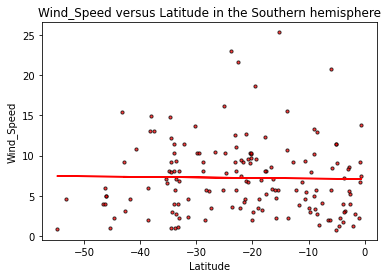

No correlation


In [95]:
# Your second requirement is to run linear regression on each relationship, only this time separating them into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):

# * Northern Hemisphere - Temperature (F) vs. Latitude
# * Southern Hemisphere - Temperature (F) vs. Latitude
# * Northern Hemisphere - Humidity (%) vs. Latitude
# * Southern Hemisphere - Humidity (%) vs. Latitude
# * Northern Hemisphere - Cloudiness (%) vs. Latitude
# * Southern Hemisphere - Cloudiness (%) vs. Latitude
# * Northern Hemisphere - Wind Speed (mph) vs. Latitude
# * Southern Hemisphere - Wind Speed (mph) vs. Latitude

# After each pair of plots explain what the linear regression is modeling such as any relationships you notice and any other analysis you may have.


plot_variables = ["MaxTemp","Humidity","Cloudiness","Wind_Speed"]
hemispheres = ["Northern","Southern"]
comments = {"MaxTemp": "Both  hemispheres show correlations of Temp reducing with distance from equator. Two points of interest: the models predict different temperatures at the equator (y-intercept) and have different slopes",
           "Humidity":"No correlation", "Cloudiness": "No correlation", "Wind_Speed": "No correlation"}
           

for Variable in plot_variables:
    for Hemisphere in hemispheres:
        x_values = df_weather_data.loc[lambda x: x.Hemisphere == Hemisphere]["Actual_Lat"].astype(float)
        y_values = df_weather_data.loc[lambda x: x.Hemisphere == Hemisphere][Variable].astype(float)
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        plt.scatter(x_values,y_values,marker="o", facecolors="red", edgecolors="black", s=10, alpha=0.75)
        plt.plot(x_values,regress_values,"r-")
        # ann_x = x_values.median(); ann_y = y_values.median()
        # plt.annotate(line_eq,(ann_x,ann_y),fontsize=12,color="red")
        plt.xlabel('Latitude')
        plt.ylabel(Variable)
        plt.title(f"{Variable} versus Latitude in the {Hemisphere} hemisphere")
        print(f"The r-squared is: {round(rvalue**2,3)}")
        print(line_eq)
        filename = f"Regression_{Variable}_verus_Latitude_in_{Hemisphere}_hemisphere.png"
        path = f"../Images/ + {filename}"
        plt.savefig(path)
        plt.show()
    print(comments[Variable])
    